In [1]:
import pandas as pd
import pickle

In [2]:
# Loading test data
test_df = pd.read_csv('../data_processed/model_data/test_data.csv')
val_df = pd.read_csv('../data_processed/model_data/val_data.csv')
test_df = pd.concat([test_df, val_df], ignore_index=True)
test_df['label'] = test_df['label'].apply(lambda x: [x])
X_test = test_df['text'].values.tolist()
y_test = test_df['label'].values.tolist()

In [3]:
# Loading required models

vect_filepath = '../models/tf_idf_vec.sav'
tf_idf_vec = pickle.load(open(vect_filepath, 'rb'))

model_filepath = '../models/dec_tree.sav'
dec_tree_clf = pickle.load(open(model_filepath, 'rb'))

mlb_path = '../models/mlb.pkl'
mlb = pickle.load(open(mlb_path, 'rb'))

C:\Users\User\AppData\Local\Temp\ipykernel_17104\1964667832.py:4: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  tf_idf_vec = pickle.load(open(vect_filepath, 'rb'))
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warni

In [4]:
X_test = tf_idf_vec.transform(X_test).toarray()
y_test = mlb.transform(y_test)

In [5]:
y_pred = dec_tree_clf.predict(X_test)

Посмотрим поклассово, что с чем путается

In [8]:
labels = list(mlb.classes_)

In [38]:
errors_stat = {}
extra_pred_stat = {}
for label in labels:
    errors_stat[label] = []
    extra_pred_stat[label] = []

In [14]:
import numpy as np

In [39]:
for pred, test in zip(y_pred, y_test):
    # несмотря на то, что модель работает для мульти-лейб классификации,
    # тк примеров мульти-лейб нет, то предполагаем, что в true лейблах задача мульти-класс
    
    class_index = np.where(test == 1)[0][0]
    if np.sum(pred) == 1:
        if (pred == test).all():
            continue
        else:
            pred_index = np.where(pred == 1)[0][0]
            errors_stat[labels[class_index]].append(labels[pred_index])
    elif np.sum(pred) == 0:
        errors_stat[labels[class_index]].append('default')
    else:
        if pred[class_index] < 1:
            for i, elem in enumerate(pred):
                if elem > 0:
                    errors_stat[labels[class_index]].append(labels[i])
        else:
            for i, elem in enumerate(pred):
                if elem > 0 and i != class_index:
                    extra_pred_stat[labels[class_index]].append(labels[i])

In [32]:
from collections import defaultdict
error_dict_sorted = defaultdict()
    
for error in errors_stat.keys():
    d = defaultdict()
    if len(errors_stat[error]) > 0:
        list_set = list(set(errors_stat[error]))
        for elem in list_set:
            d[elem] = errors_stat[error].count(elem)       
        d = dict(sorted(d.items(), key=lambda item: item[1], reverse=True))
    error_dict_sorted[error] = d

In [51]:
import matplotlib.pyplot as plt

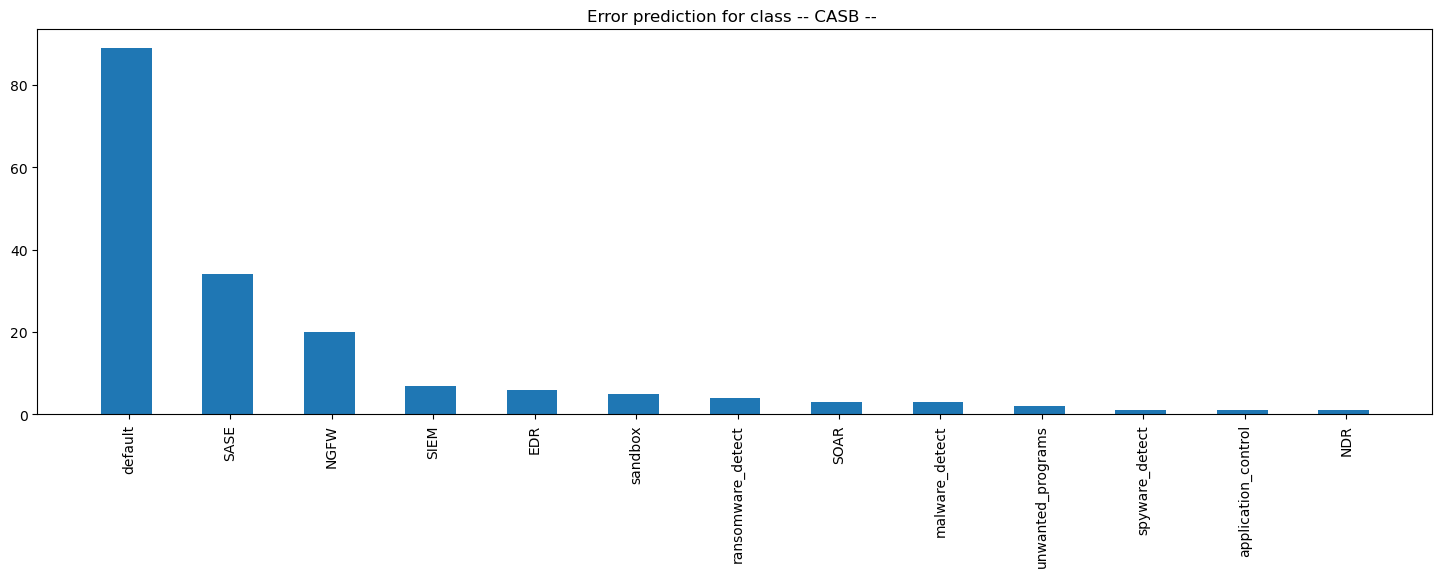

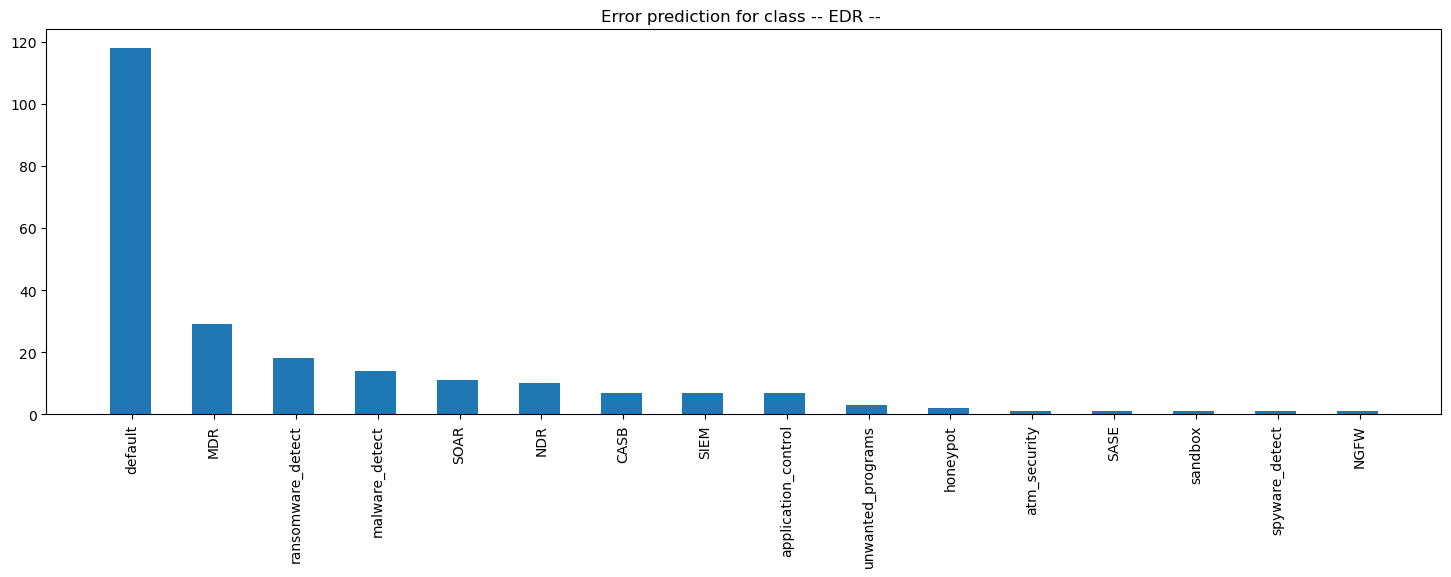

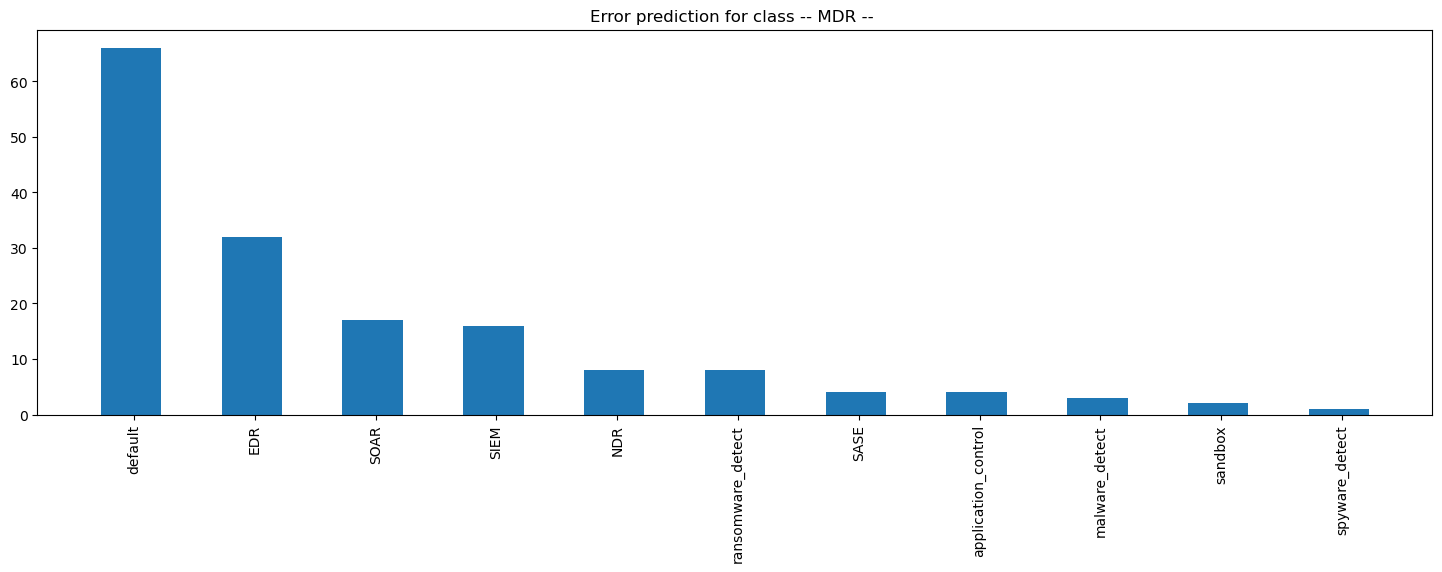

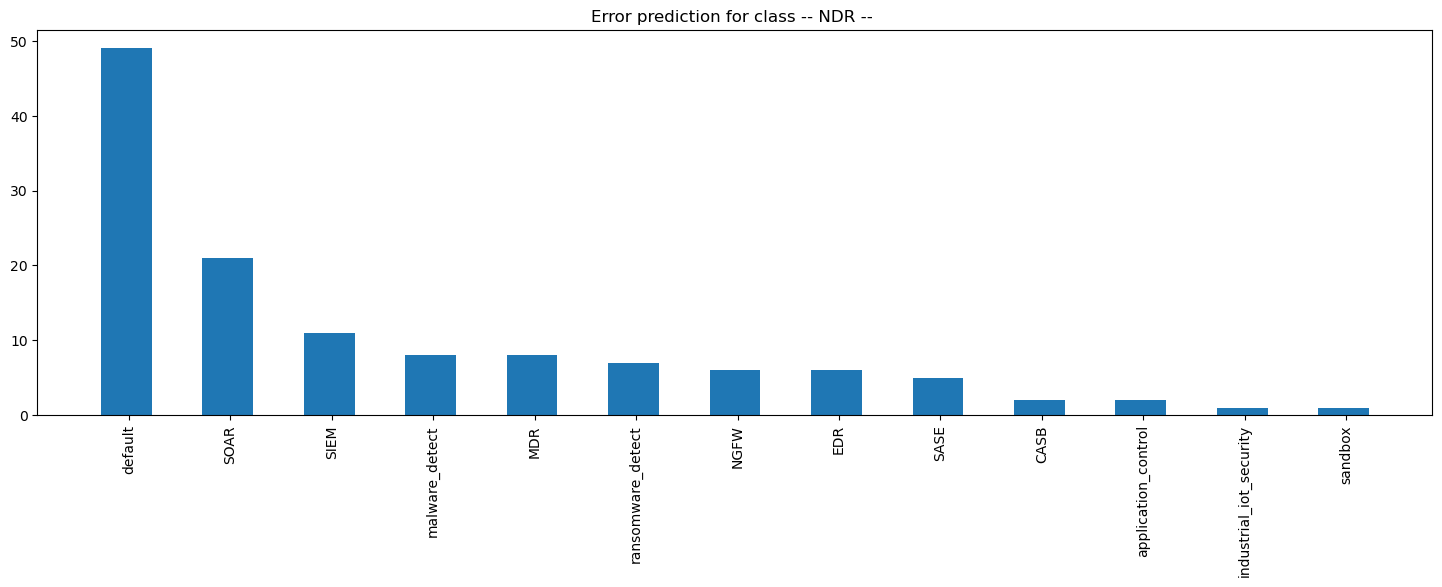

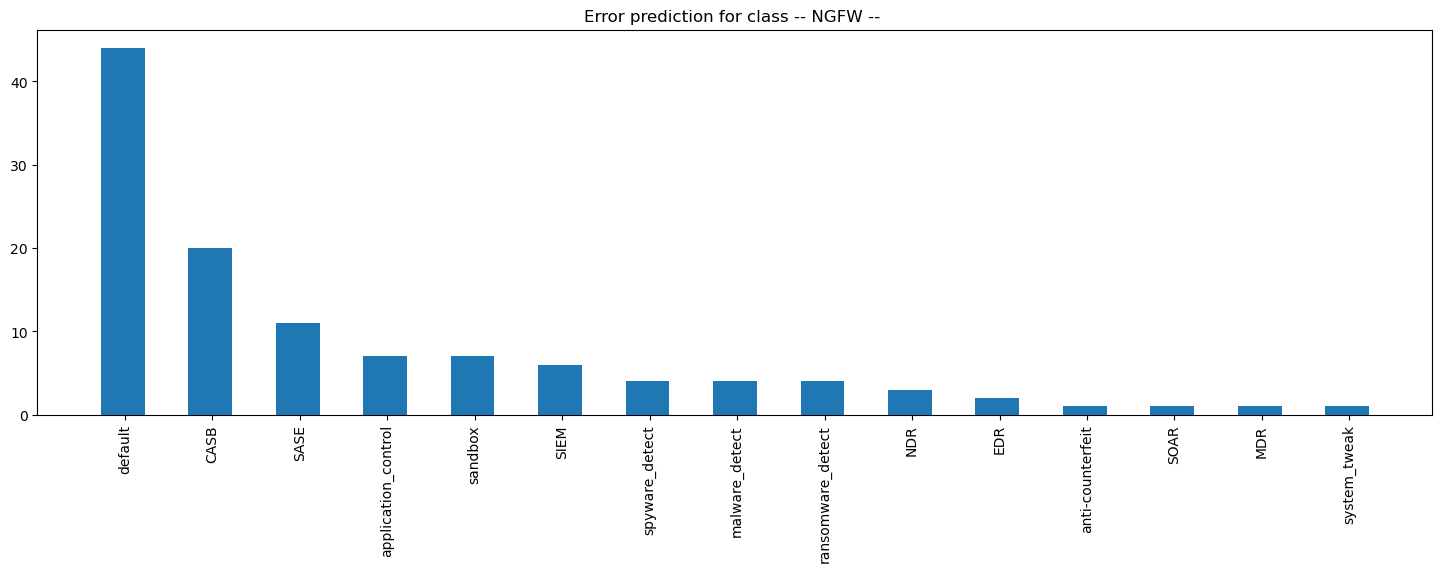

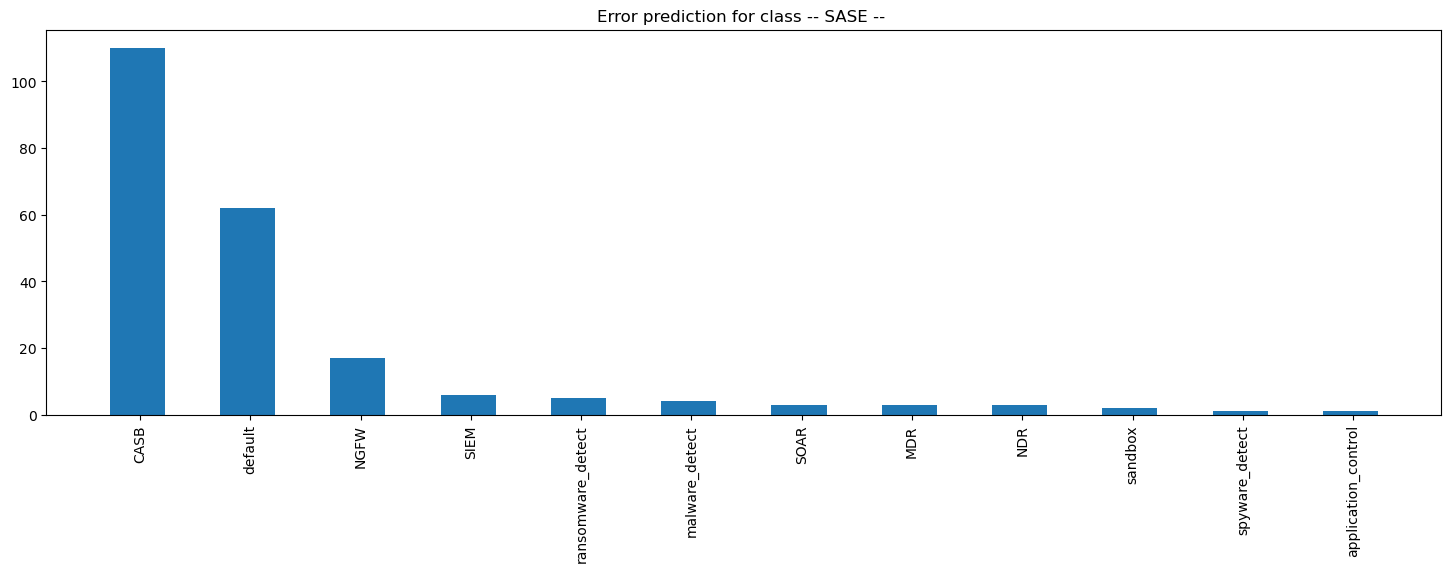

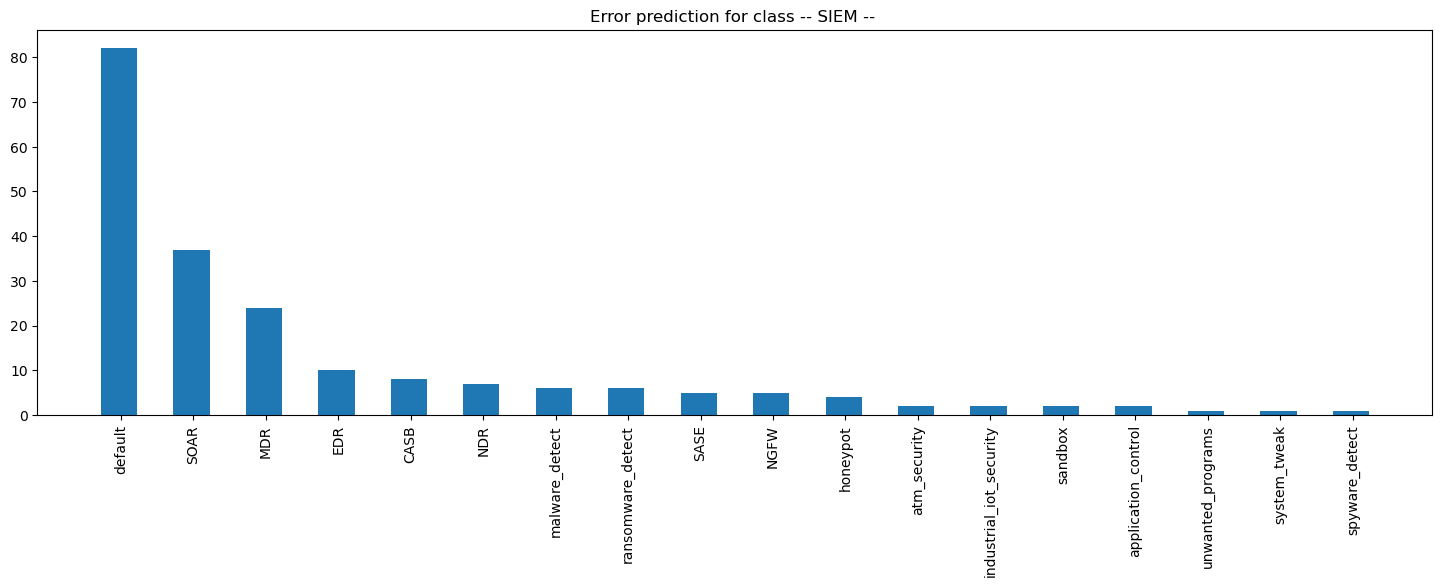

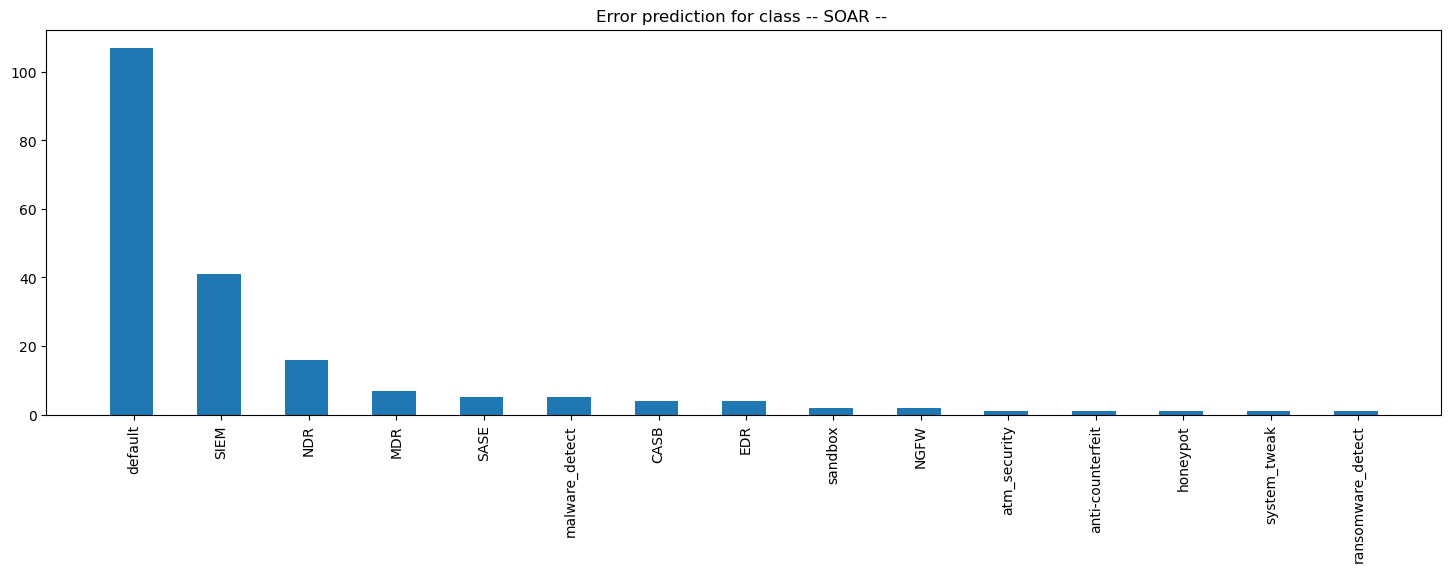

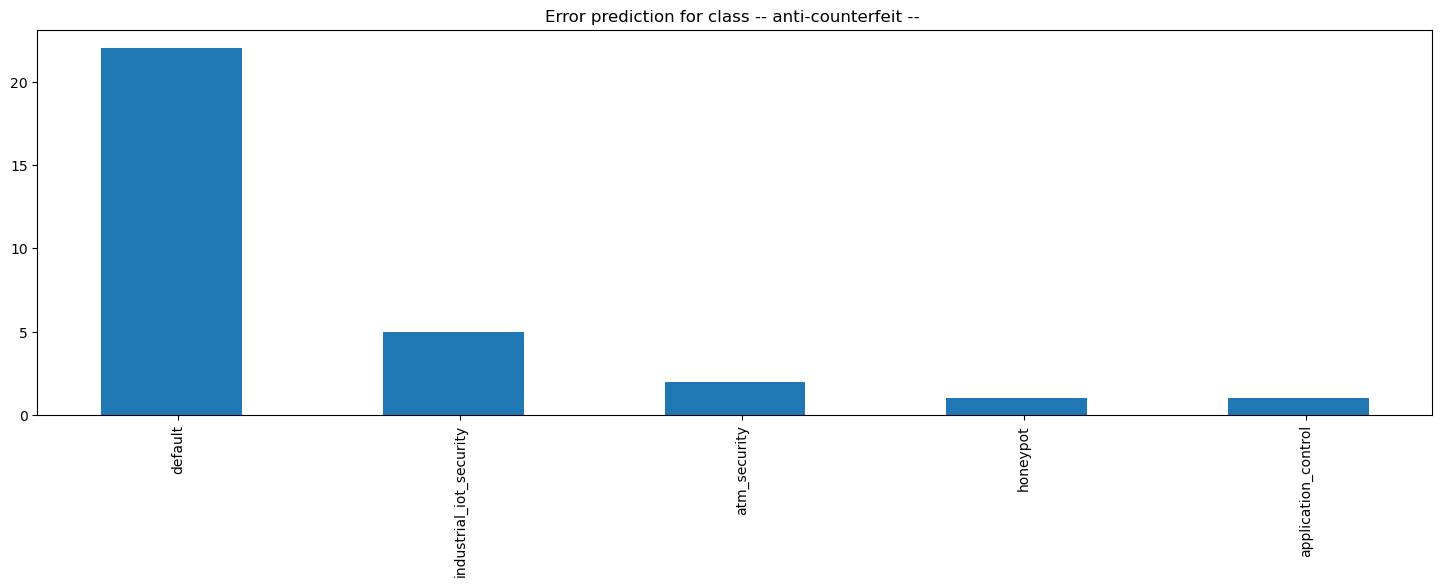

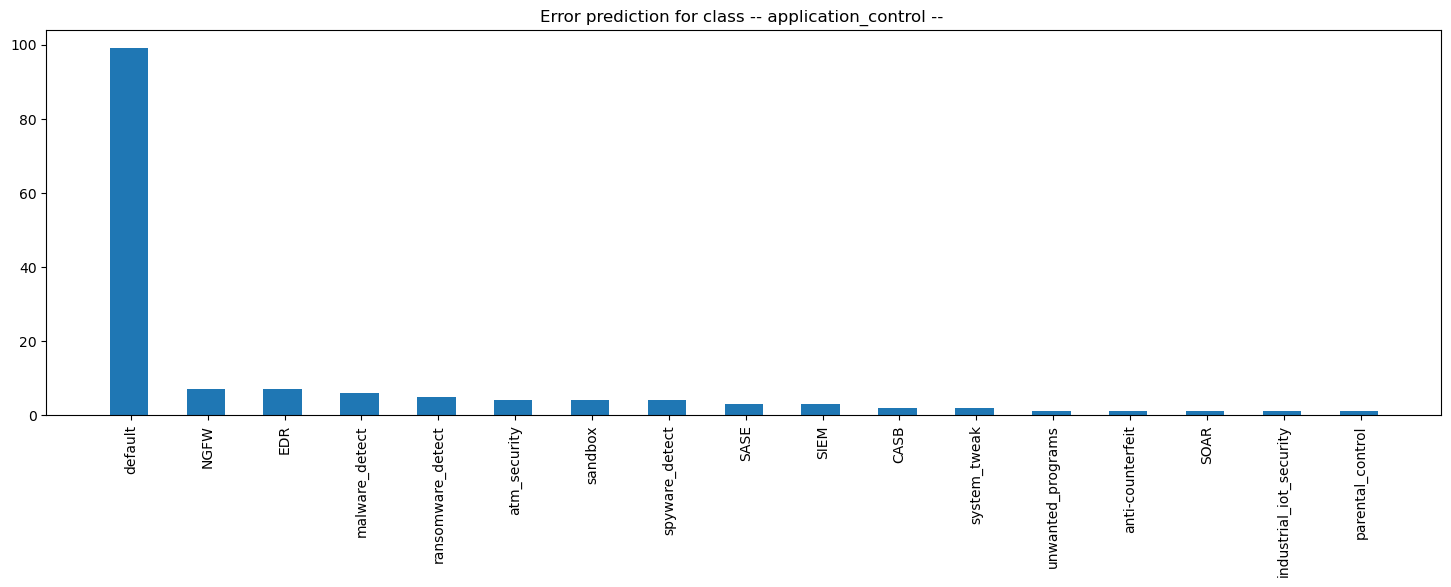

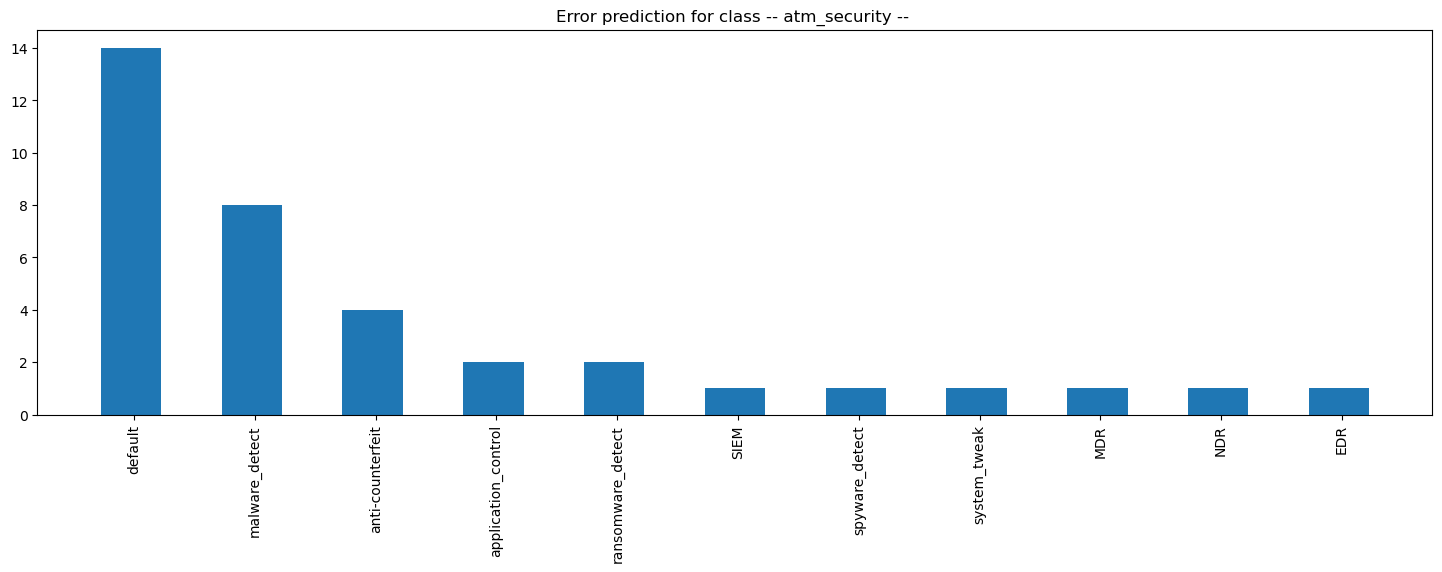

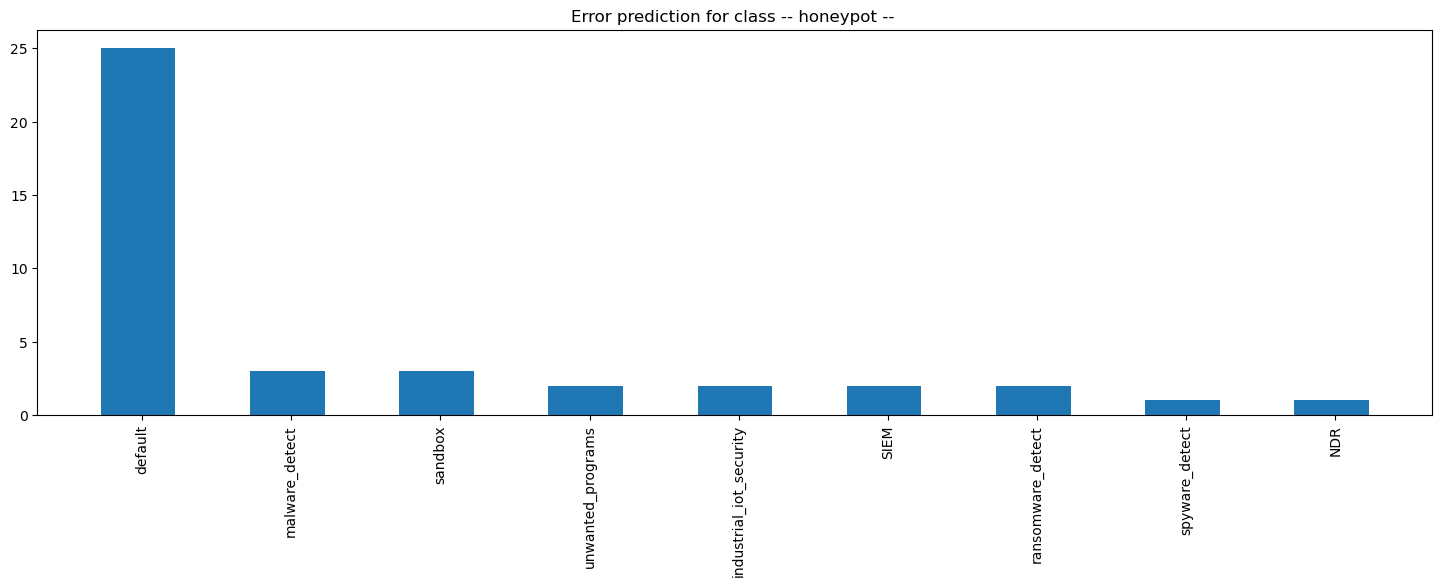

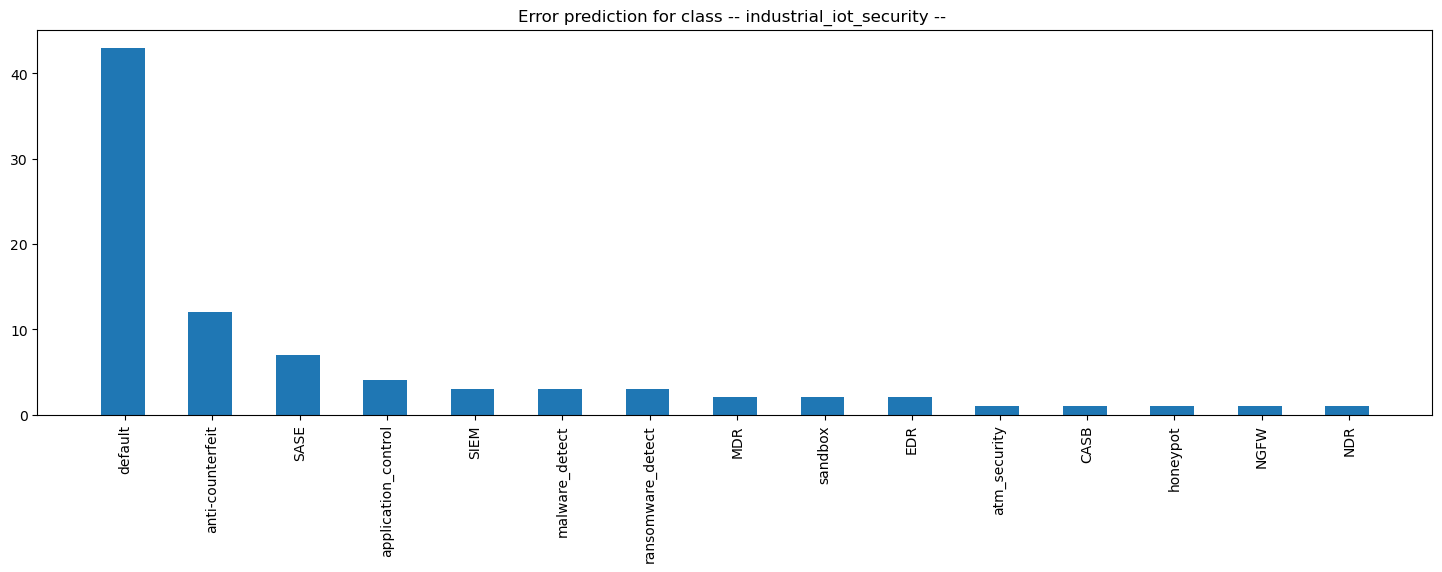

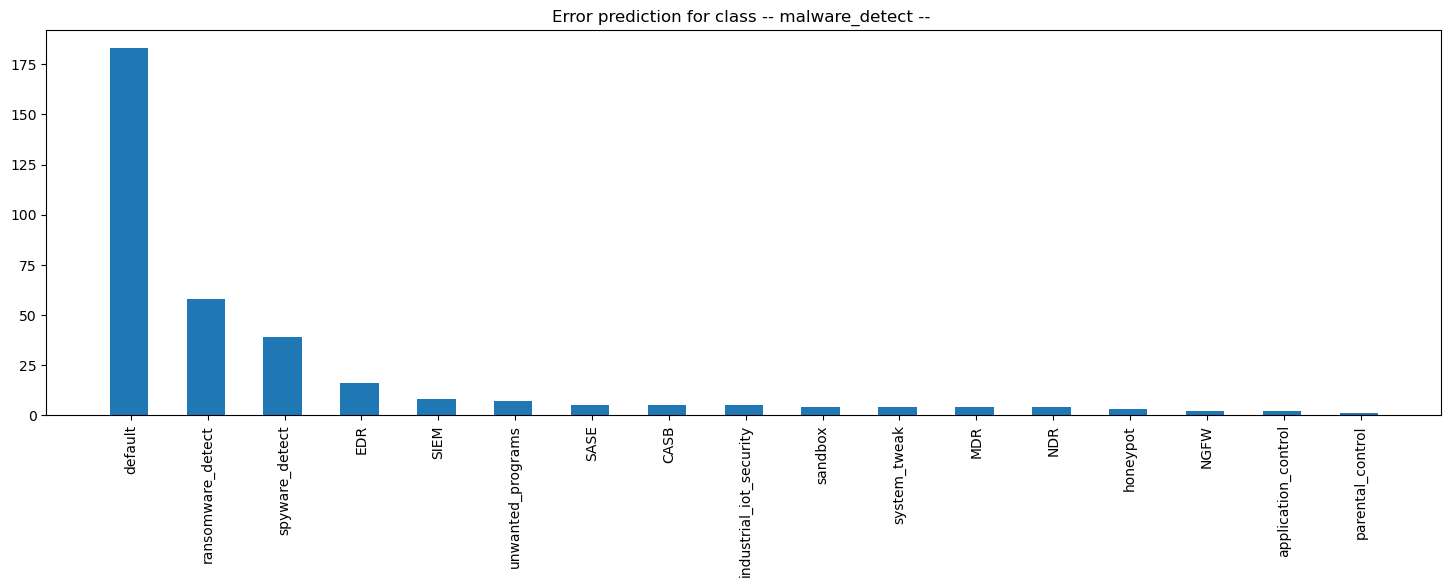

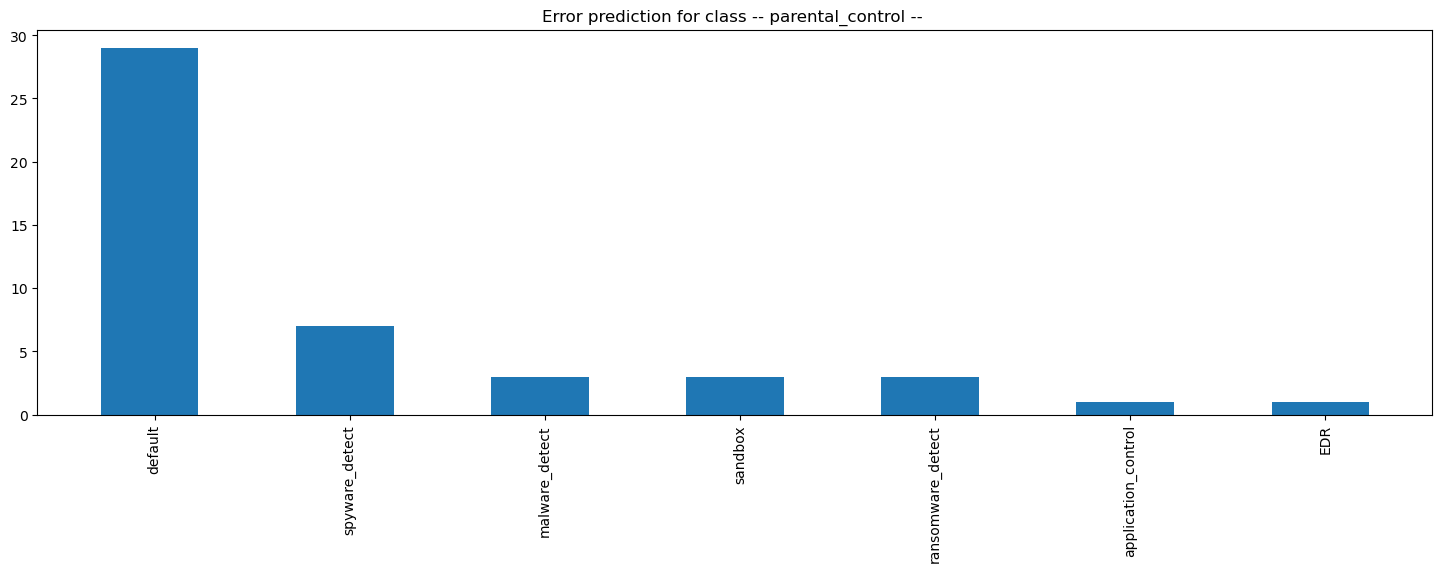

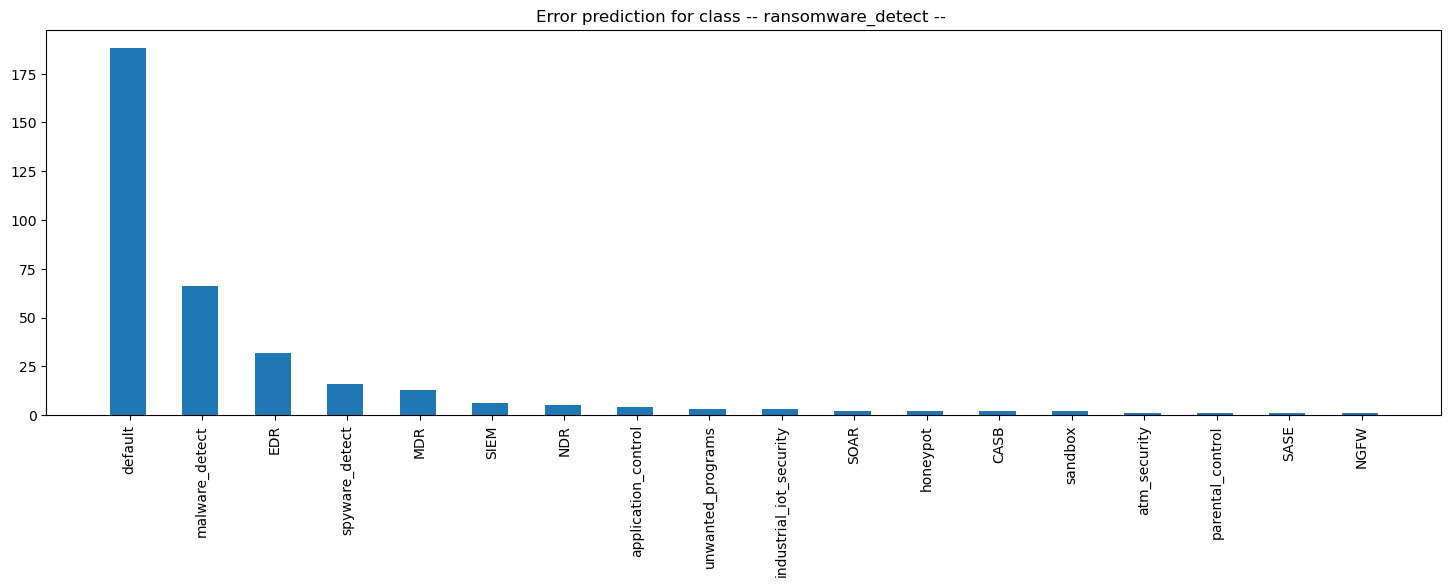

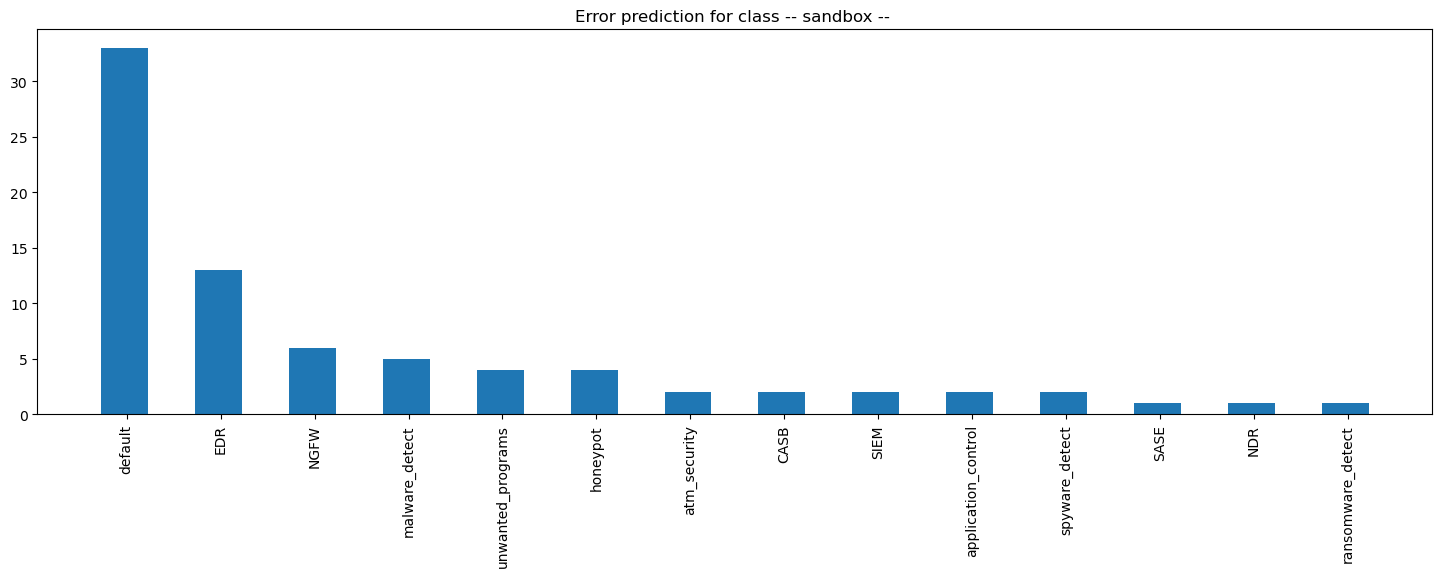

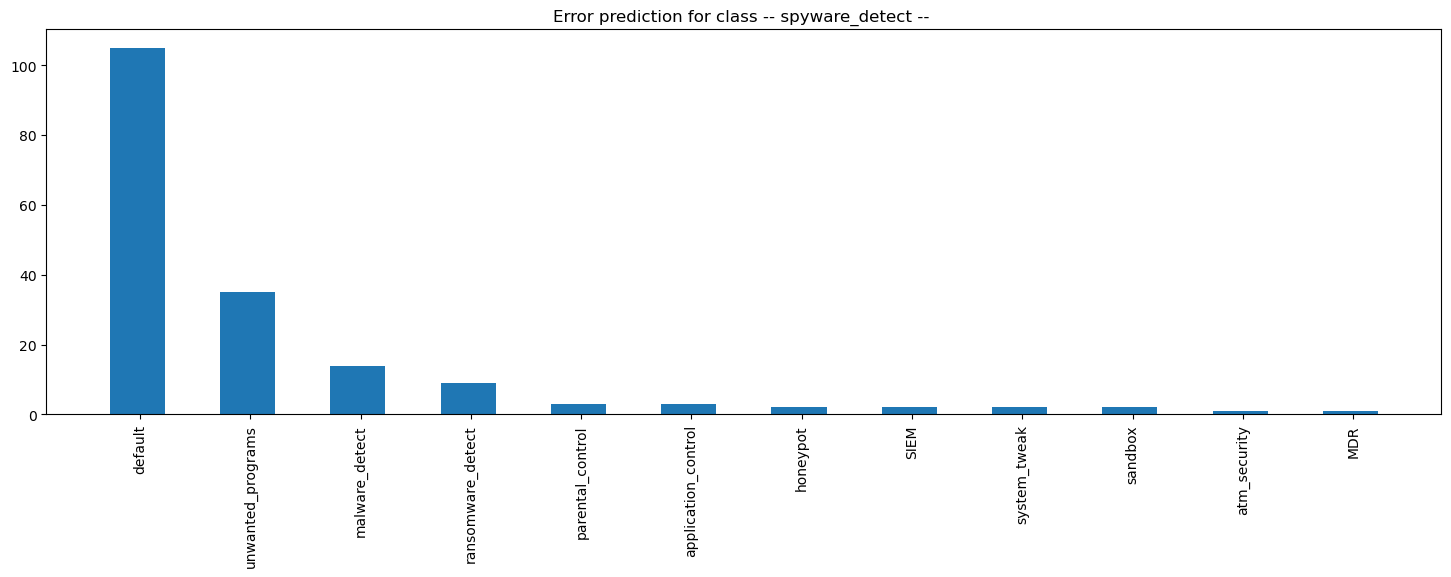

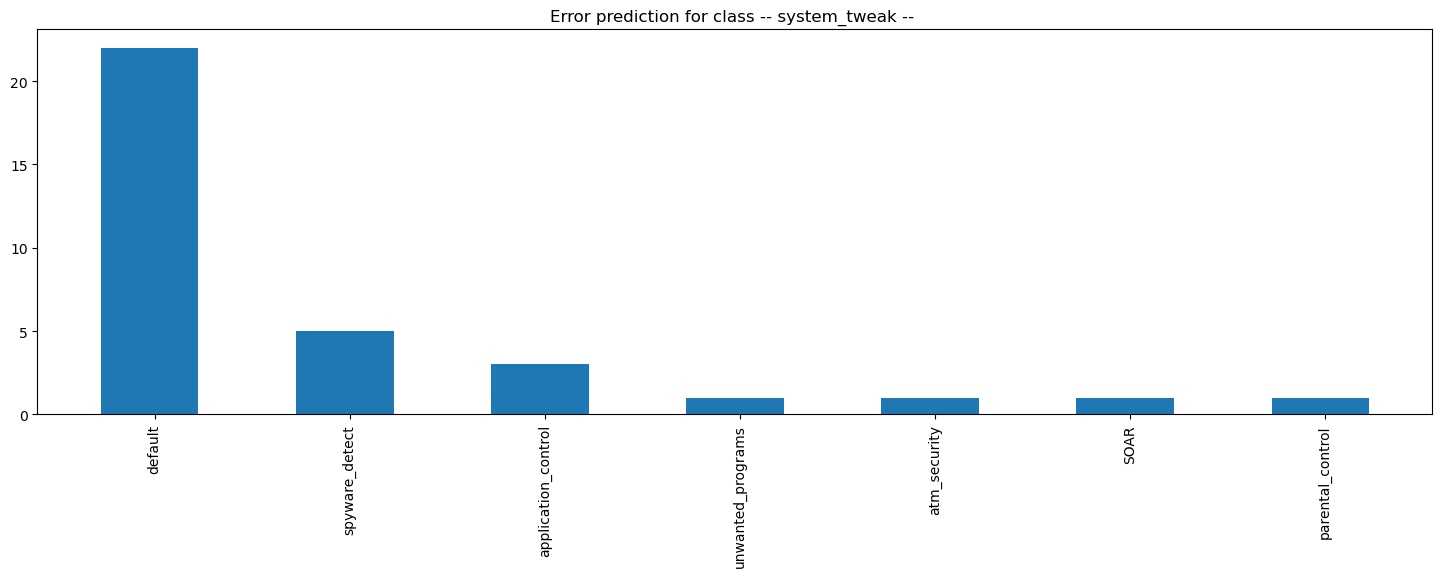

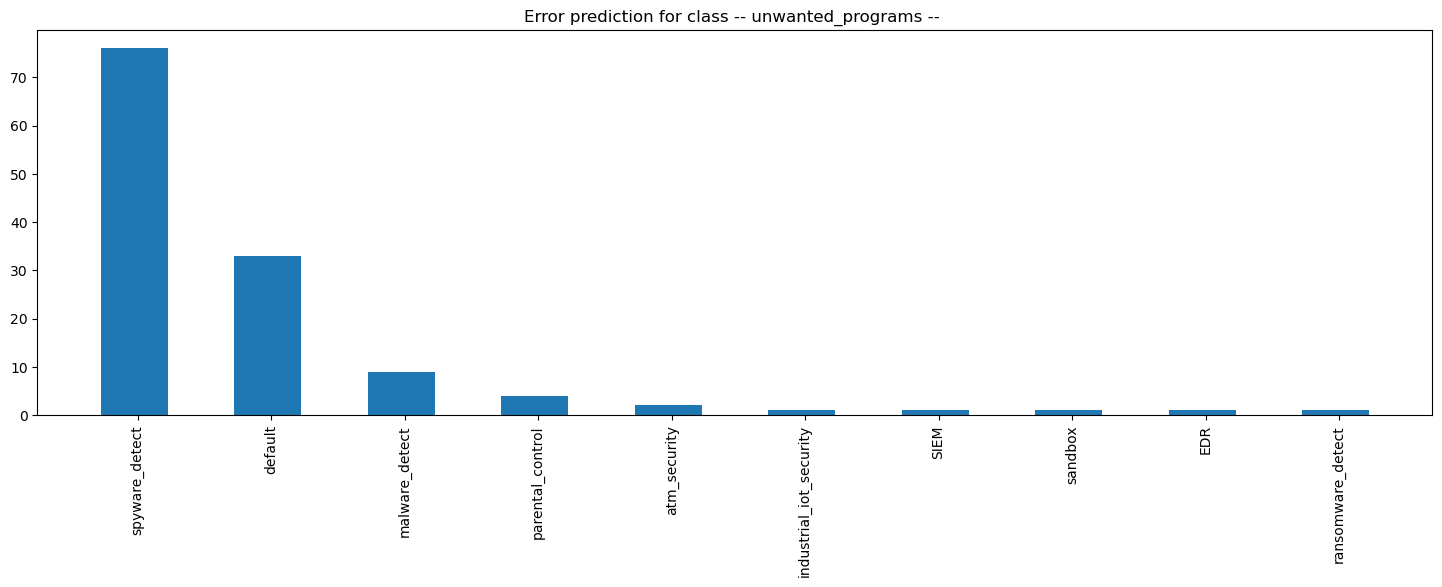

In [50]:
for label in error_dict_sorted.keys():
    x = []
    values = []
    for item, value in error_dict_sorted[label].items():
        x.append(item)
        values.append(value)
        
    indexes = np.arange(len(x))
    width = 0.5
    plt.figure(figsize=(18,5))
    plt.bar(indexes, values, width)
    plt.title('Error prediction for class -- {} -- '.format(label))
    plt.xticks(indexes + width * 0.05, x)
    plt.xticks(rotation=90)

    plt.show()

In [41]:
extra_dict_sorted = defaultdict()
    
for error in extra_pred_stat.keys():
    d = defaultdict()
    if len(extra_pred_stat[error]) > 0:
        list_set = list(set(extra_pred_stat[error]))
        for elem in list_set:
            d[elem] = extra_pred_stat[error].count(elem)       
        d = dict(sorted(d.items(), key=lambda item: item[1], reverse=True))
    extra_dict_sorted[error] = d

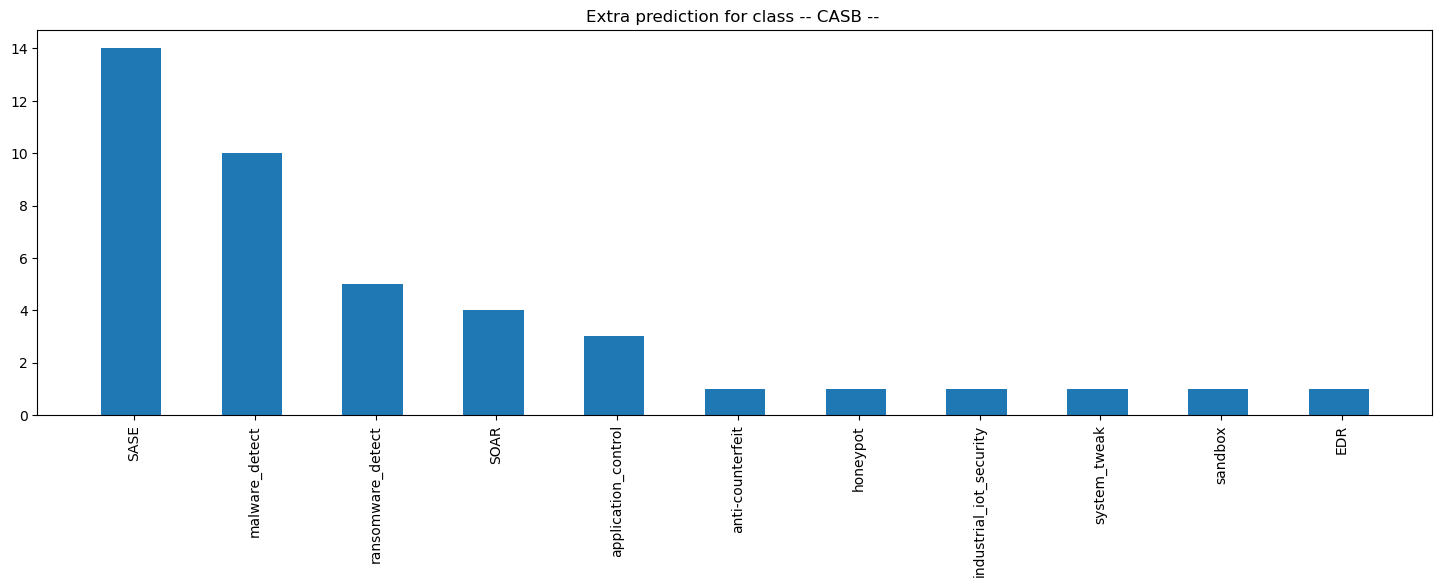

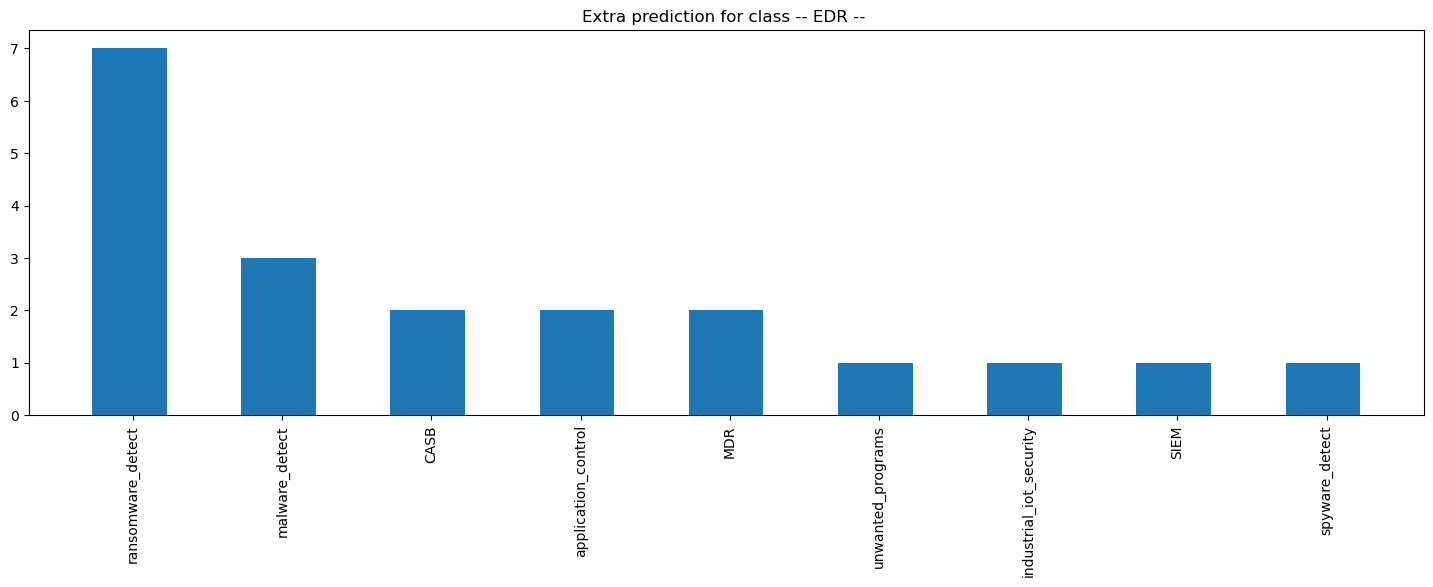

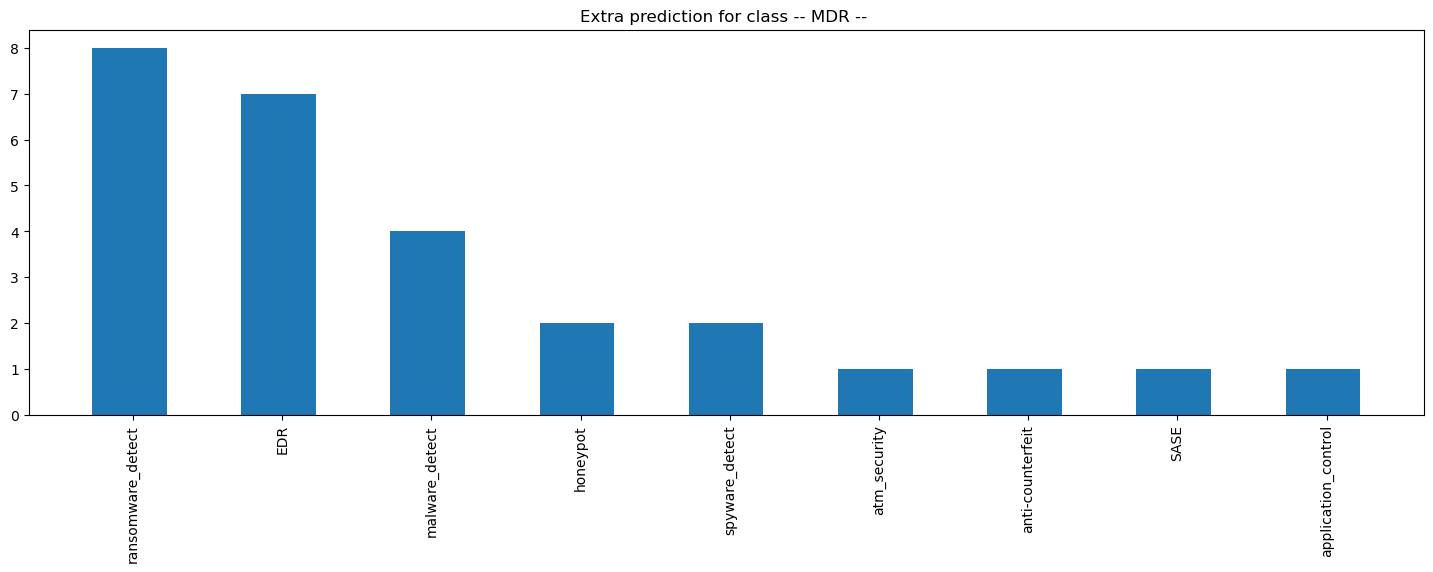

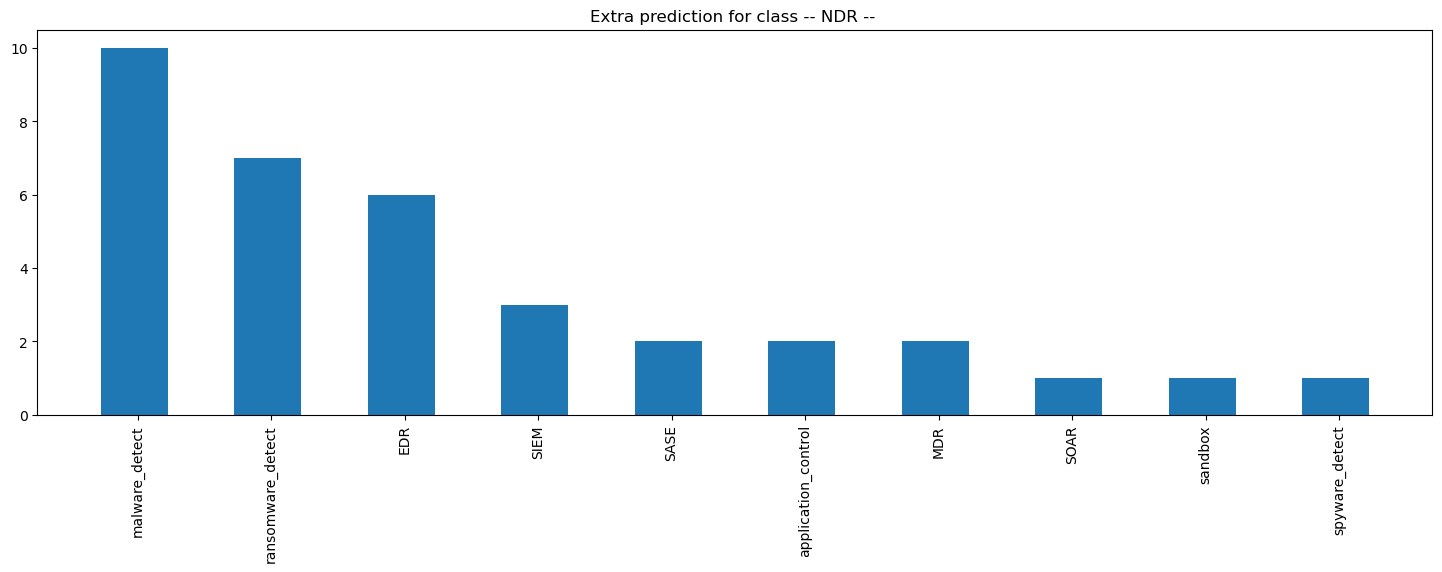

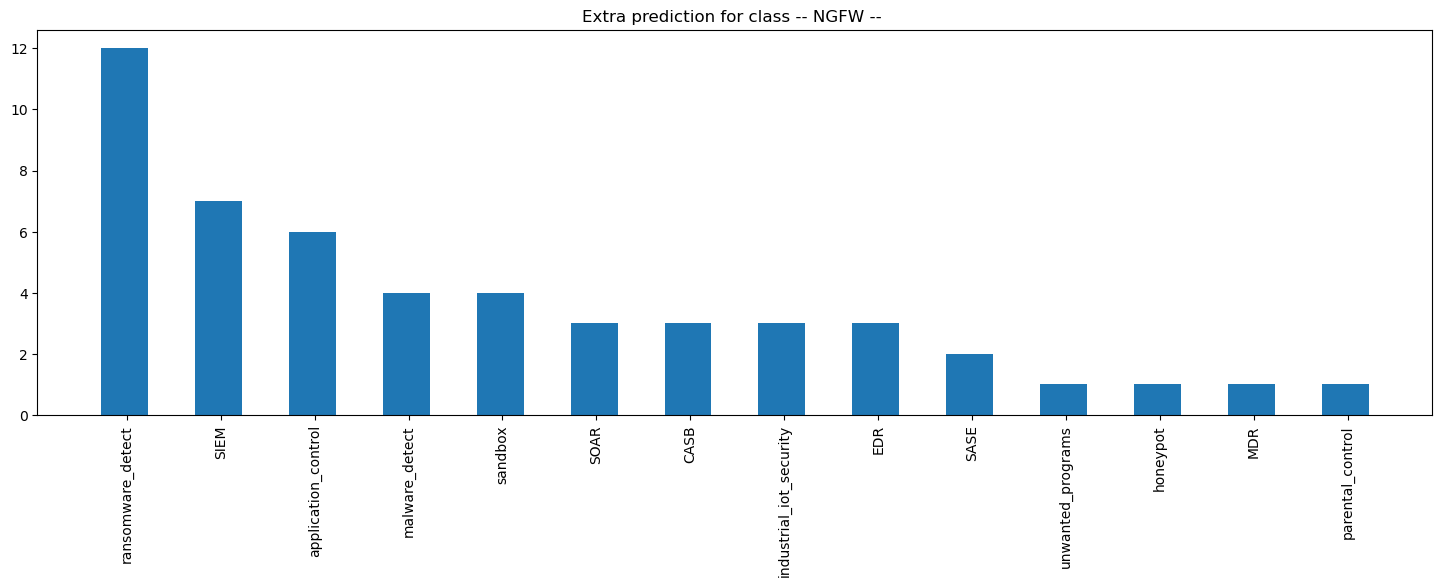

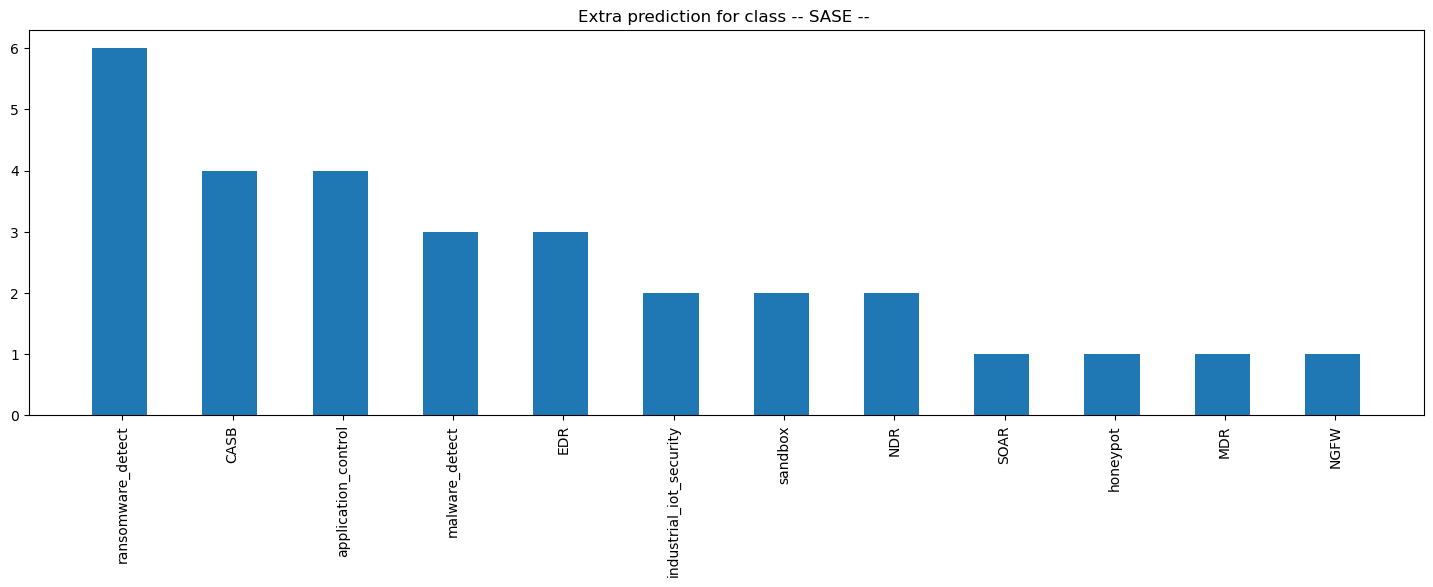

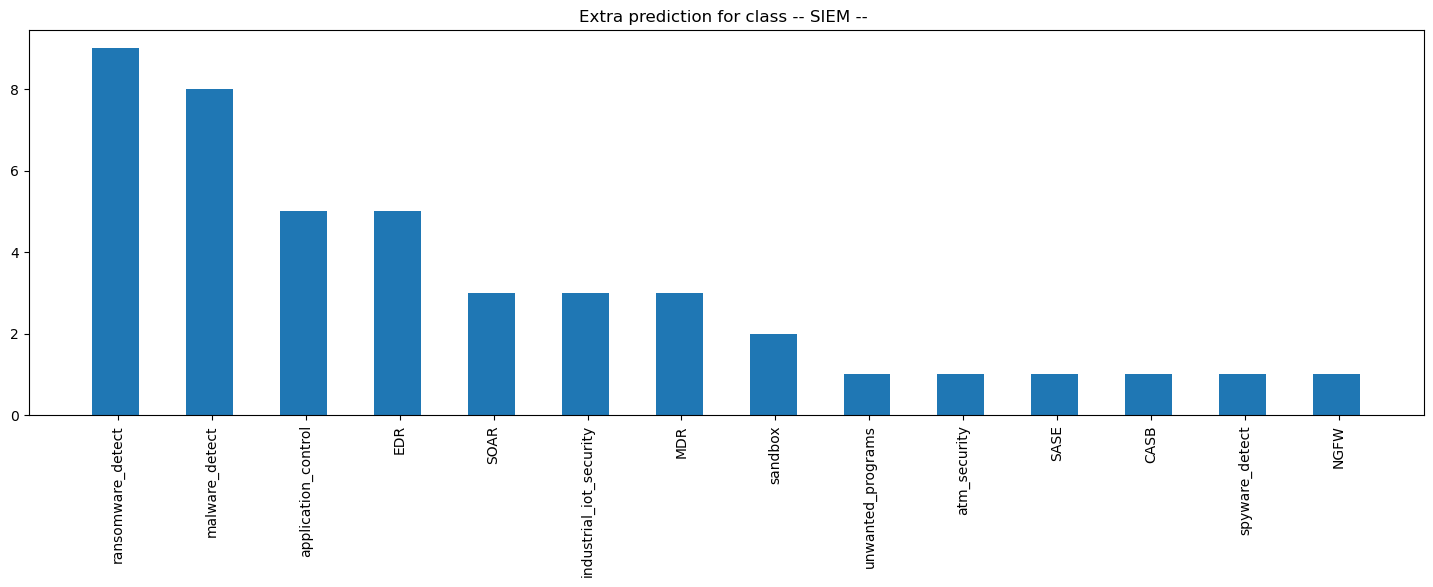

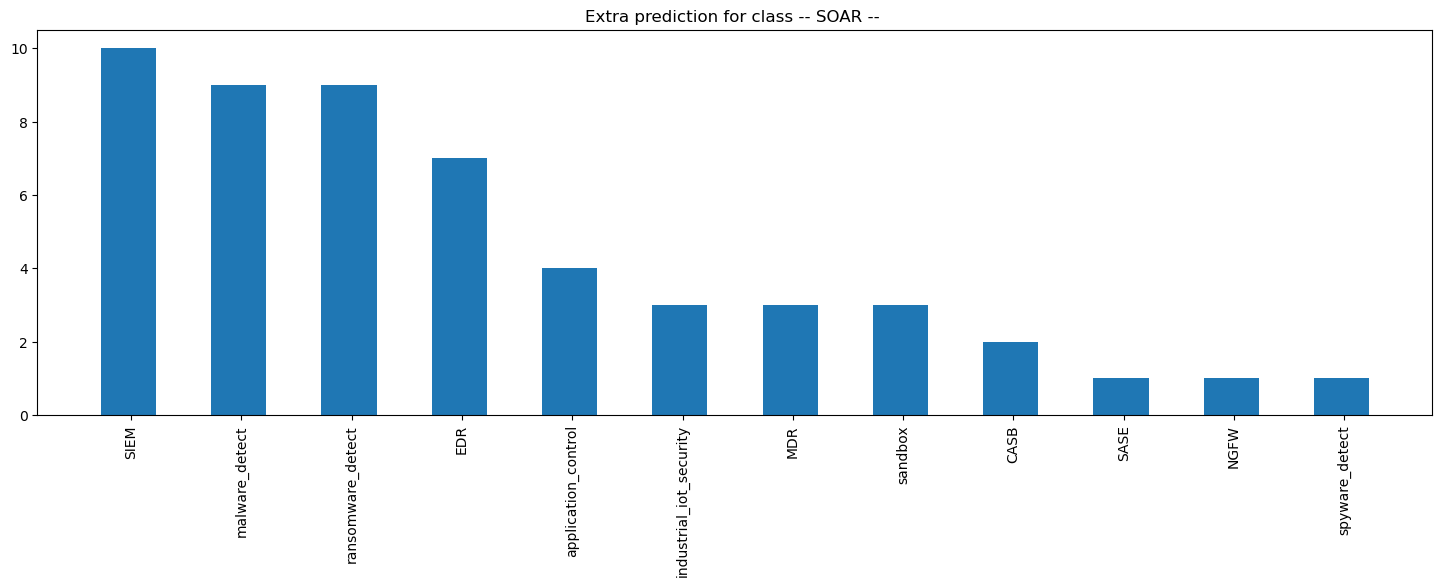

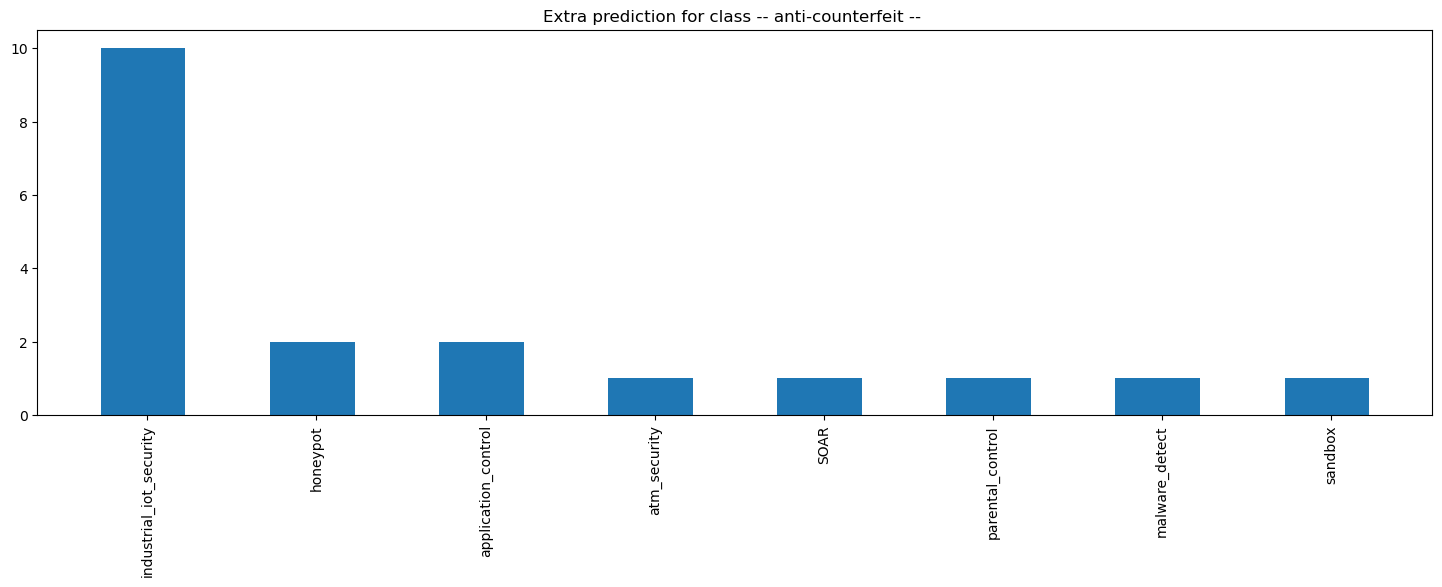

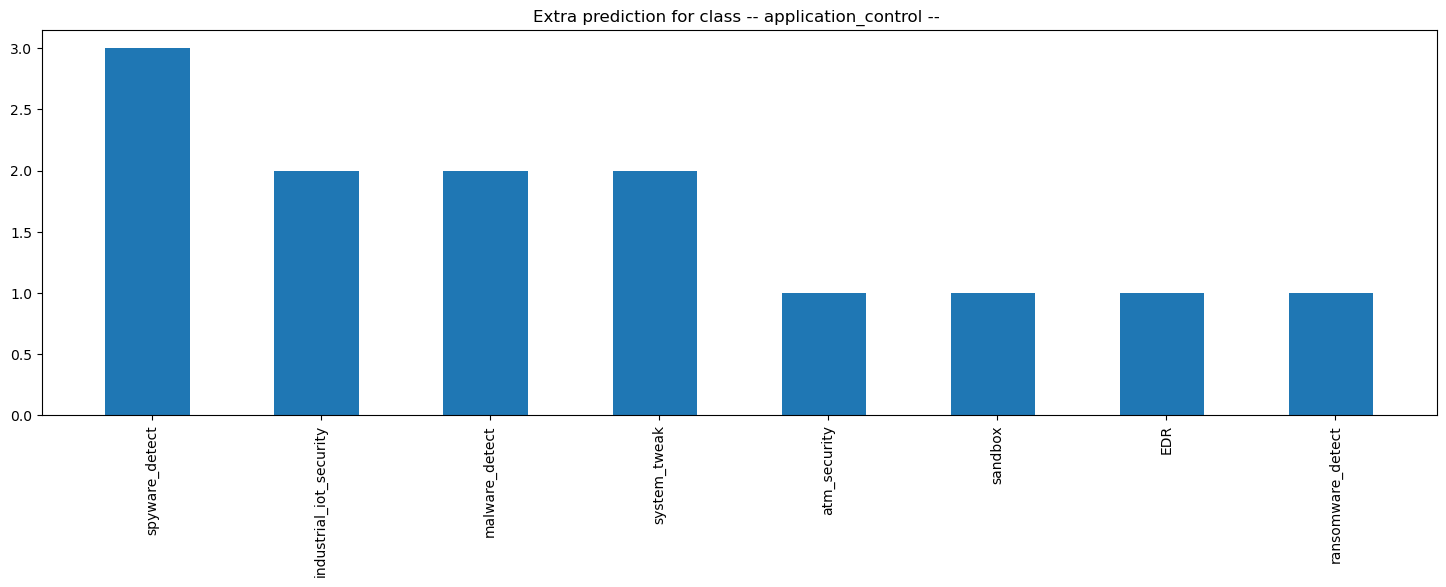

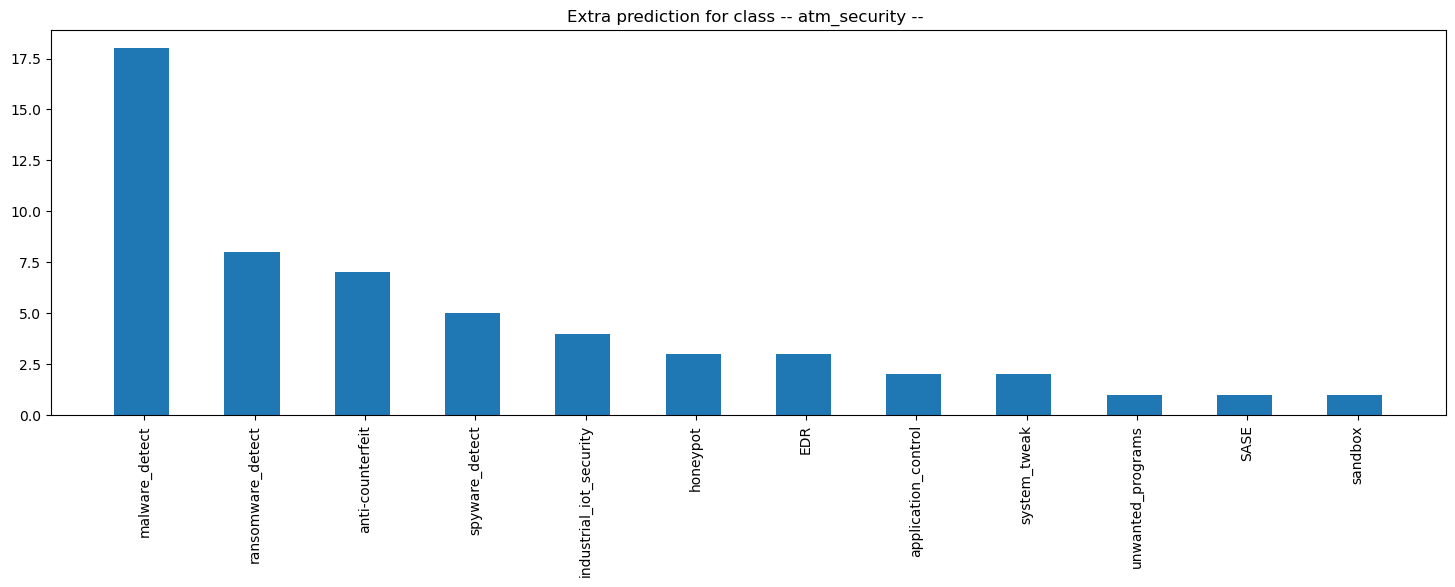

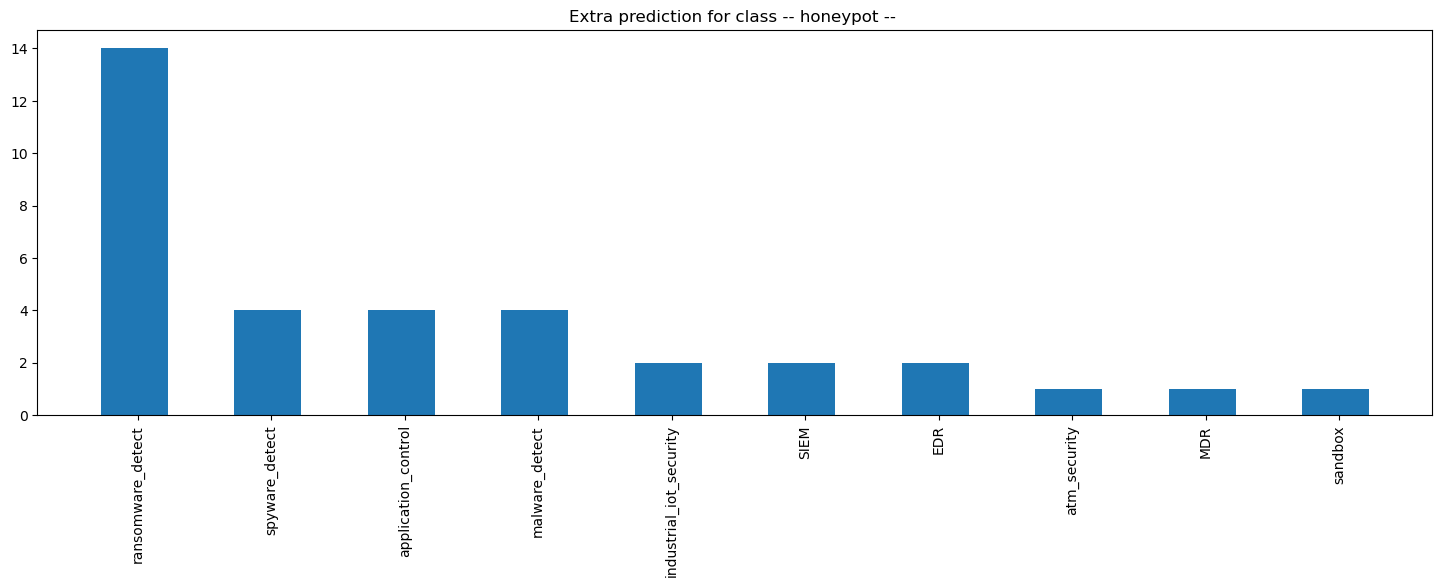

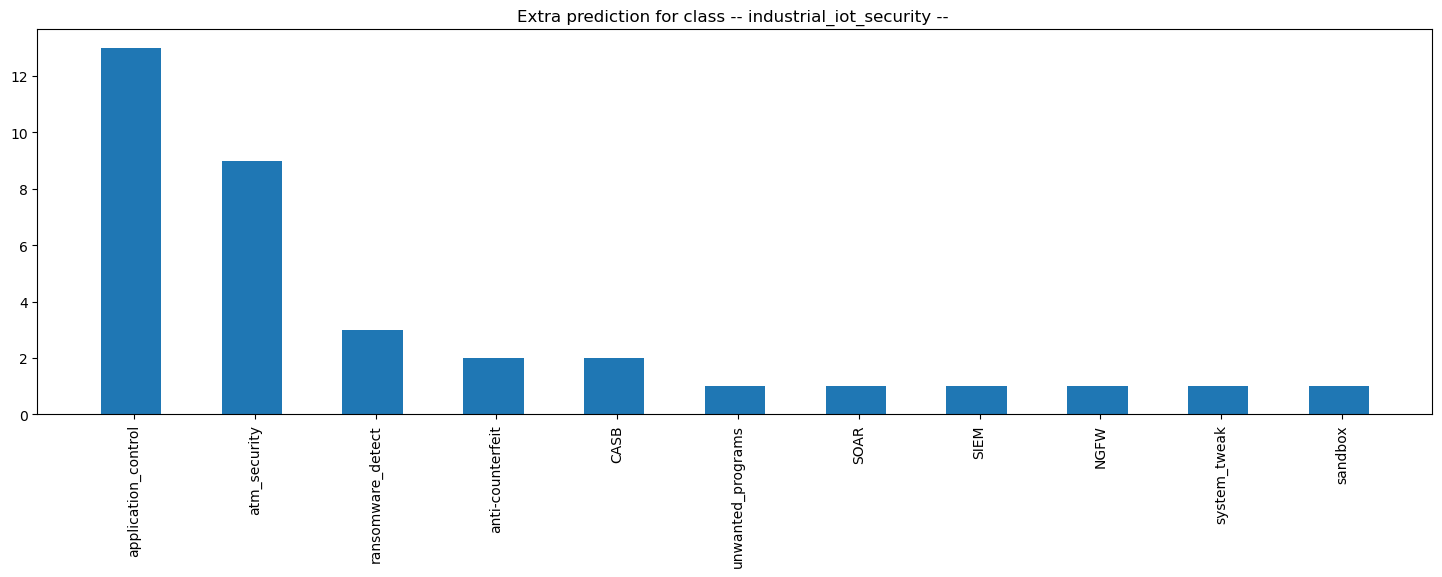

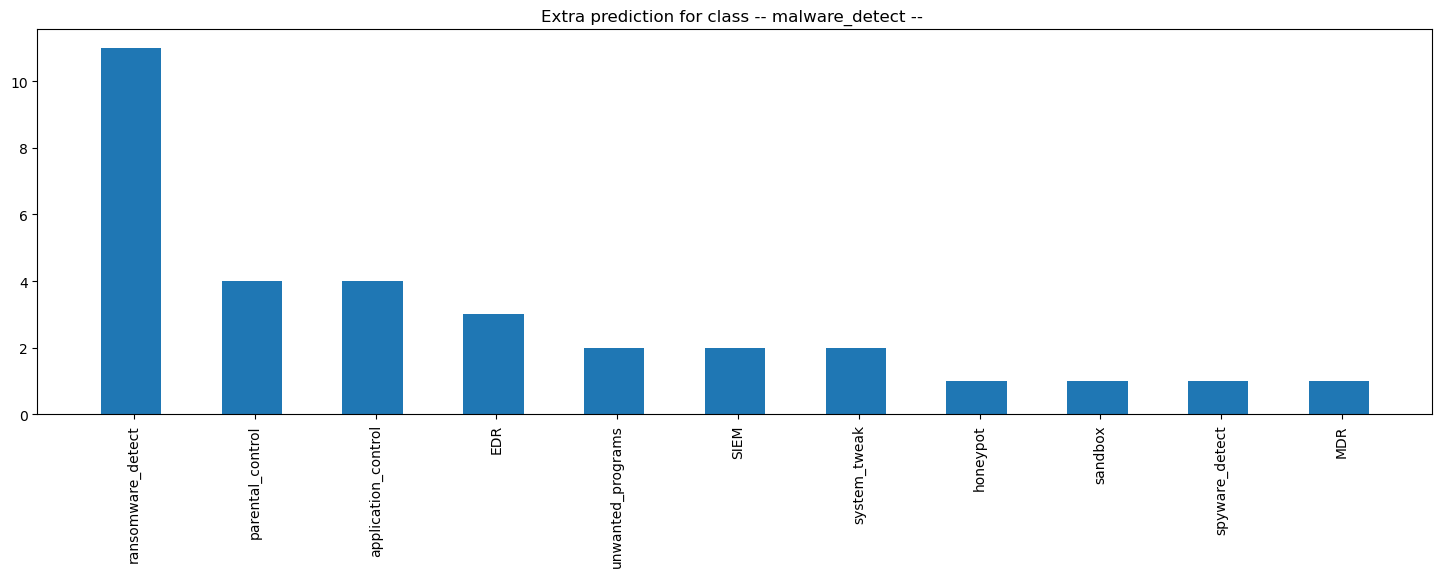

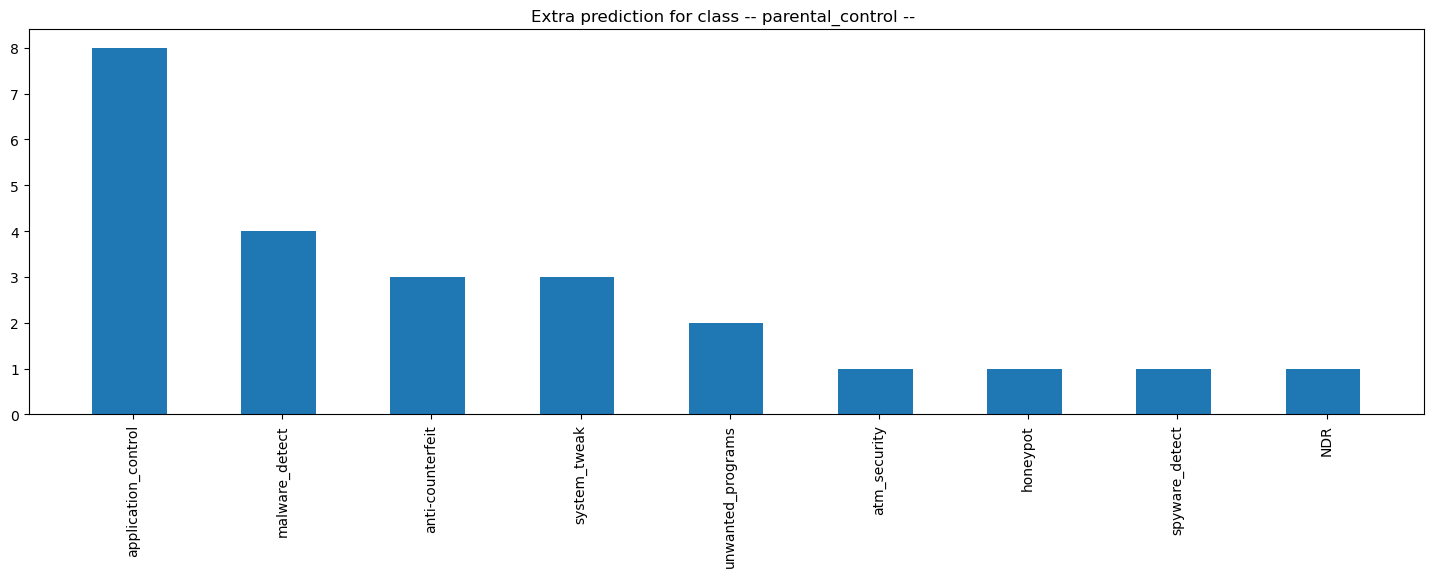

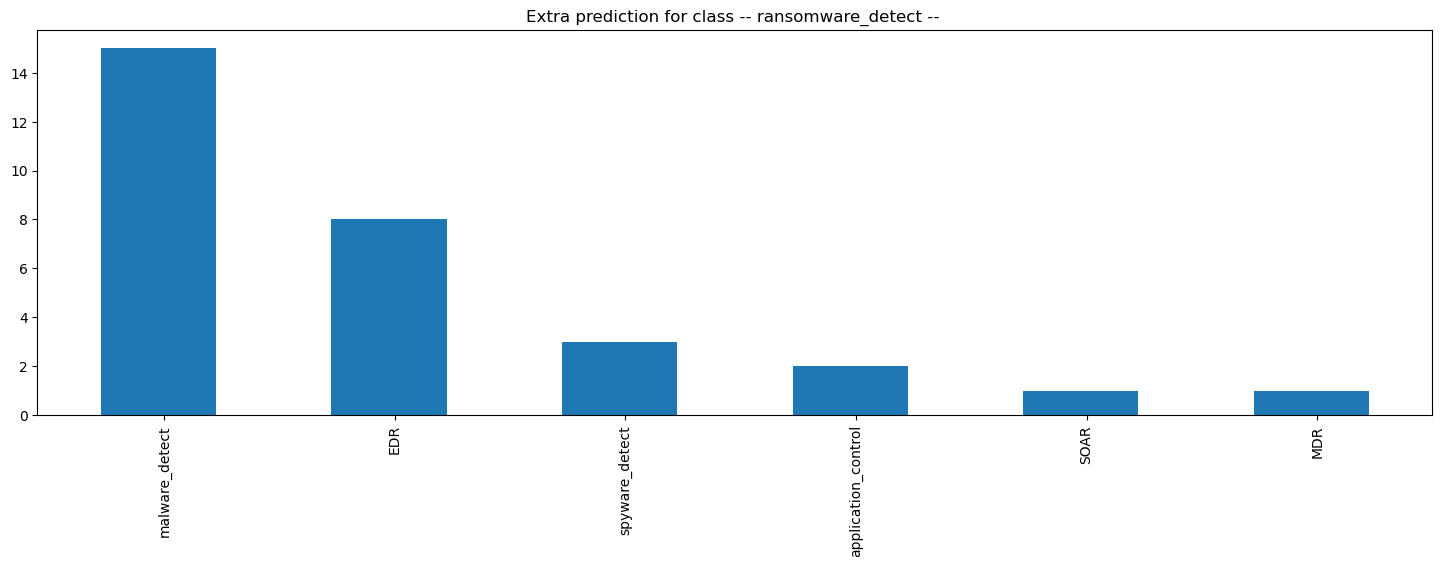

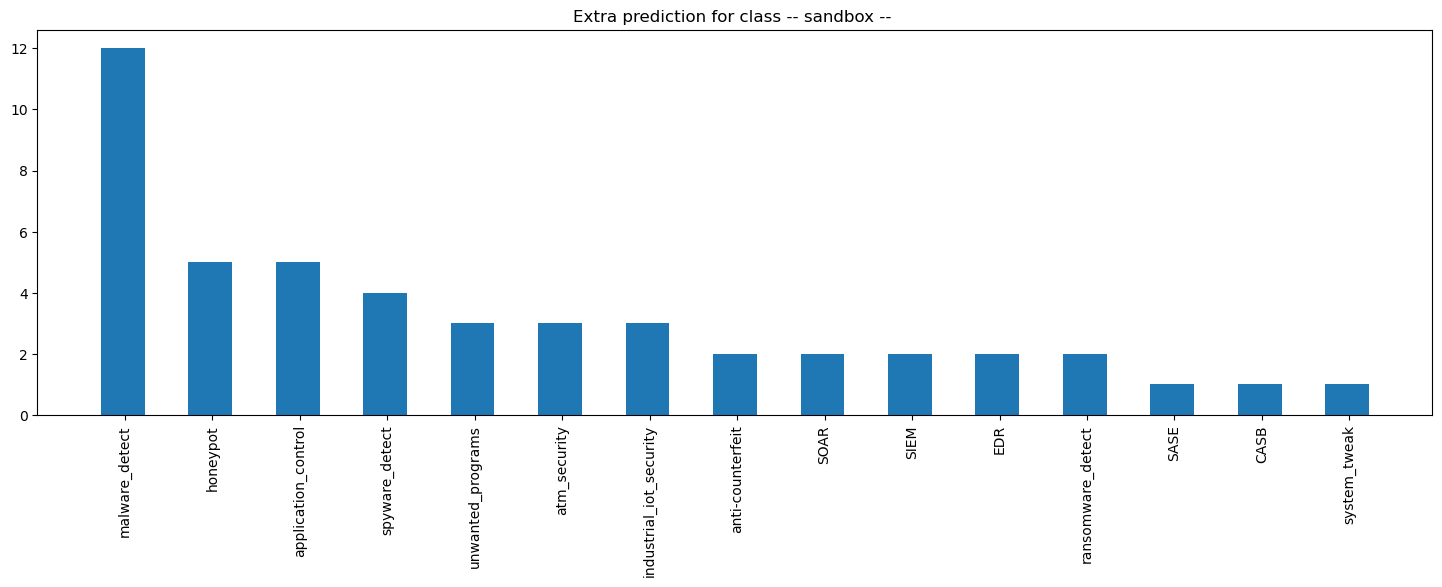

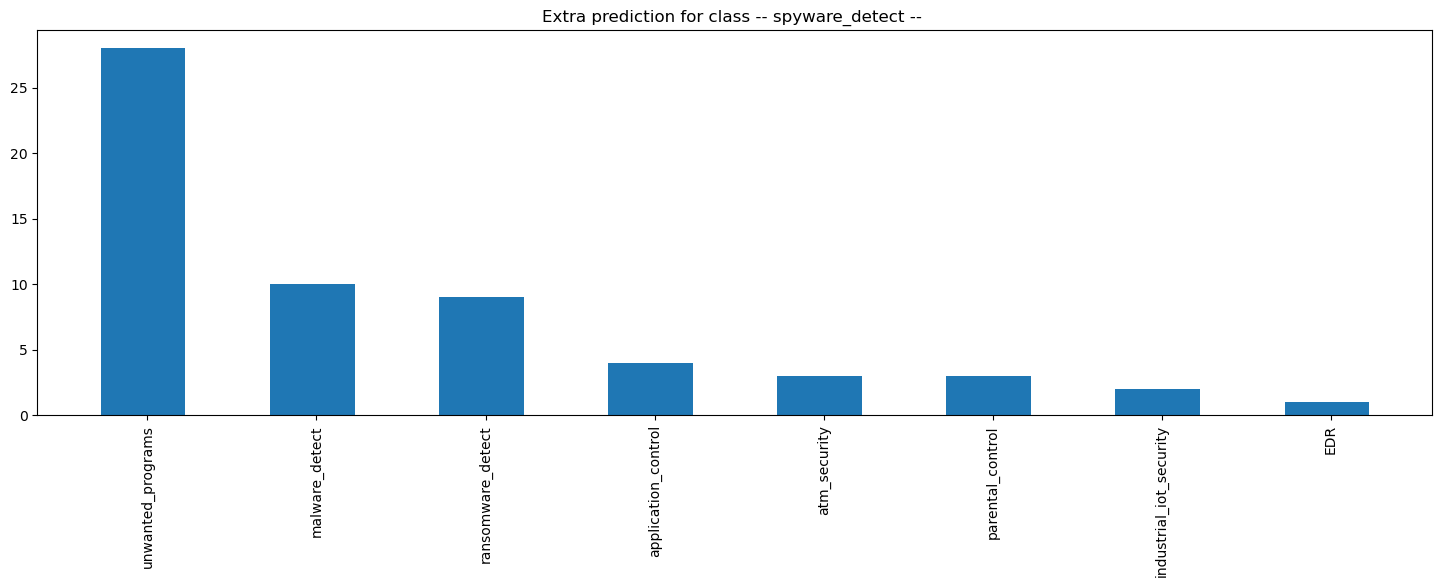

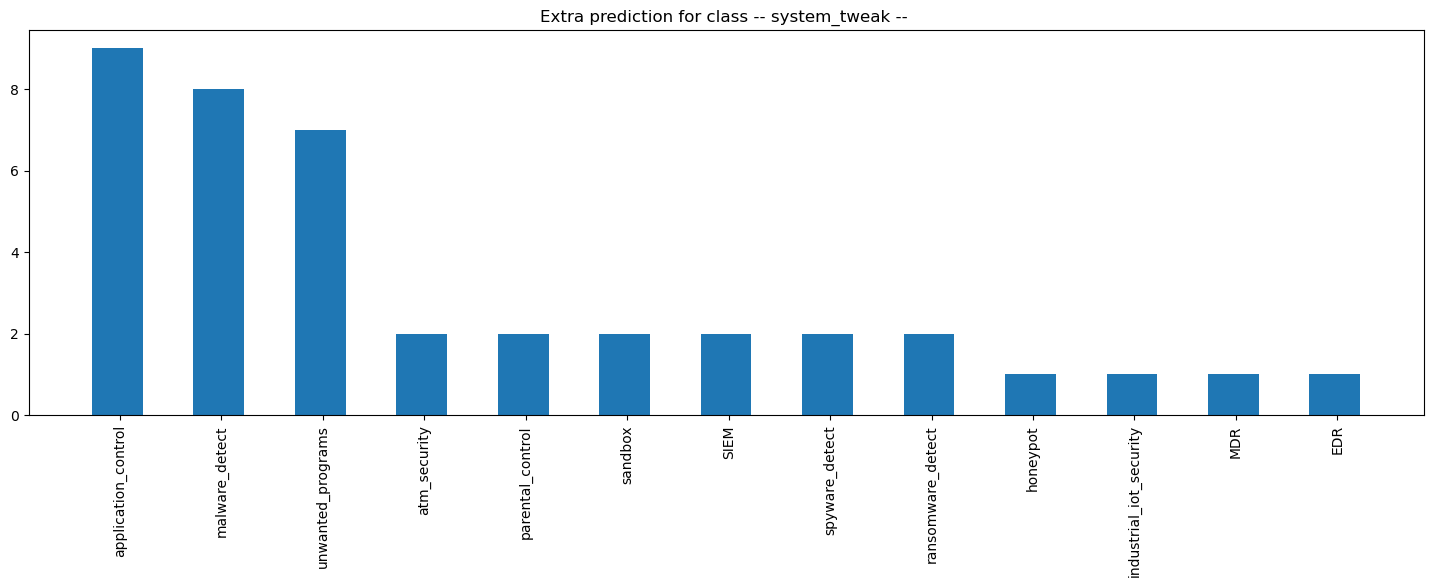

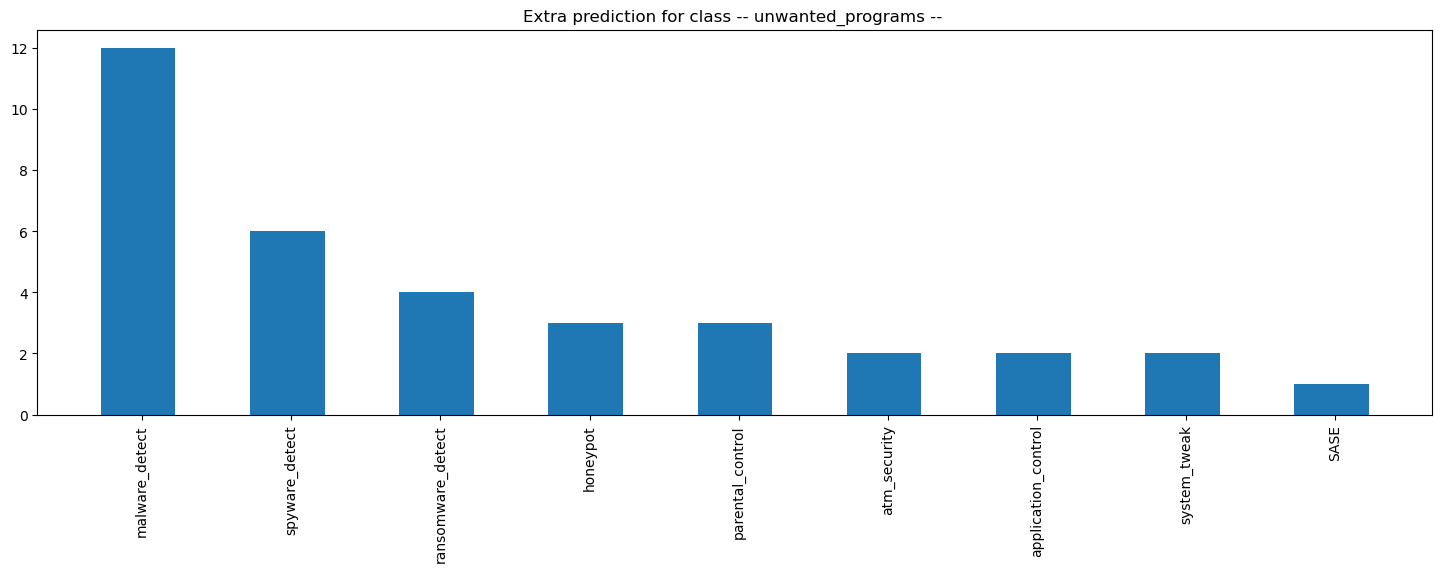

In [49]:
for label in extra_dict_sorted.keys():
    x = []
    values = []
    for item, value in extra_dict_sorted[label].items():
        x.append(item)
        values.append(value)
        
    indexes = np.arange(len(x))
    width = 0.5
    plt.figure(figsize=(18,5))
    plt.bar(indexes, values, width)
    plt.title('Extra prediction for class -- {} -- '.format(label))
    plt.xticks(indexes + width * 0.05, x)
    plt.xticks(rotation=90)

    plt.show()